In [1]:
# Data processing
# ==============================================================================
import pandas as pd 
import numpy as np

# Modelling
# ==============================================================================
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


# Memory Optimization
# ==============================================================================
import gc
gc.collect()

# Printing outputs 
# ==============================================================================
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
    

In [2]:
data = pd.read_excel('data.xlsx')
data.shape

(1000, 21)

In [3]:
data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,6,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,3,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,5,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,6,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,6,A124,80,A143,A153,3,A173,3,A191,A201,2


In [4]:
data.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [6]:
data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [7]:
# Get only the numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits', 'dependents', 'status']


In [8]:
# Get only the numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['checkin_acc', 'credit_history', 'purpose', 'svaing_acc', 'present_emp_since', 'personal_status', 'other_debtors', 'property', 'inst_plans', 'housing', 'job', 'telephone', 'foreign_worker']


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation(df, title="Correlation Matrix"):
    """
    Plots a correlation matrix for the numerical columns in the given DataFrame.
    
    Args:
        df (pandas.DataFrame): The input DataFrame.
        title (str): The title of the plot.
    """
    # Get only the numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    # Calculate the correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Create a mask to display only the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the correlation plot
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
    # Add title and legend
    ax.set_title(title, fontsize=16)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    # Display the plot
    plt.show()

/Users/a81060586/anaconda3/envs/mlcourse/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


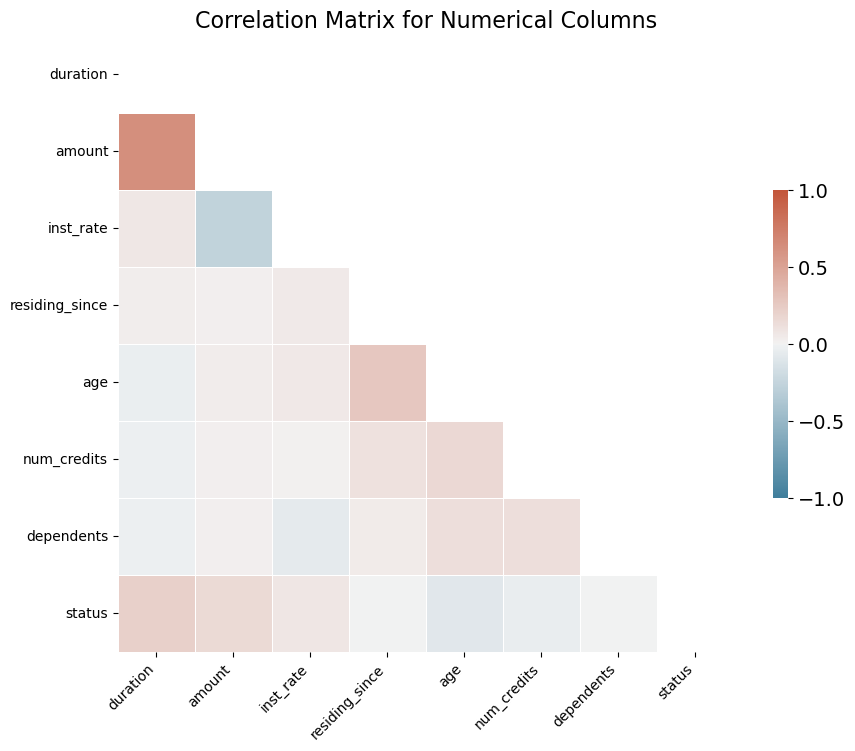

In [10]:
# Call the function to plot the correlation matrix
plot_correlation(data[numerical_columns], title="Correlation Matrix for Numerical Columns")

In [11]:

def data_check(df):
    """
    Performs various data checks on a given DataFrame.
    
    Args:
        df (pandas.DataFrame): The input DataFrame.
        
    Returns:
        A dictionary containing the results of the data checks.
    """
    
    # Initialize an empty dictionary to store the results
    results = {}
    
    # Iterate over each column in the DataFrame
    for col in df.columns:
        col_data = df[col]
        col_type = col_data.dtype
        
        # Check if the column is categorical or numerical
        if col_type == 'object' or col_data.nunique() <= 10:
            # Categorical column
            results[col] = {
                'type': 'categorical',
                'unique_values': col_data.unique(),
                'num_unique_values': col_data.nunique()
            }
            
            # Check if the column is ordinal, nominal, or binary
            if col_data.nunique() == 2:
                results[col]['category'] = 'binary'
            elif col_data.dtype.kind in ['i', 'f']:
                results[col]['category'] = 'ordinal'
            else:
                results[col]['category'] = 'nominal'
                
        else:
            # Numerical column
            results[col] = {
                'type': 'numerical',
                'num_missing': col_data.isnull().sum(),
                'pct_missing': col_data.isnull().mean() * 100,
                'non_numeric_values': col_data[~col_data.apply(lambda x: isinstance(x, (int, float)))].unique()
            }
            
            # Check for additional numerical properties
            if col_type == 'int64':
                results[col]['min_value'] = col_data.min()
                results[col]['max_value'] = col_data.max()
            else:
                results[col]['min_value'] = col_data.min()
                results[col]['max_value'] = col_data.max()
                results[col]['mean'] = col_data.mean()
                results[col]['std'] = col_data.std()
    
    return results

In [12]:

results = data_check(data)

for col, col_results in results.items():
    print(f"Column: {col}")
    for result_key, result_value in col_results.items():
        print(f"  {result_key}: {result_value}")
    print("-" * 30)

Column: checkin_acc
  type: categorical
  unique_values: ['A11' 'A12' 'A14' 'A13']
  num_unique_values: 4
  category: nominal
------------------------------
Column: duration
  type: numerical
  num_missing: 0
  pct_missing: 0.0
  non_numeric_values: []
  min_value: 6
  max_value: 108
------------------------------
Column: credit_history
  type: categorical
  unique_values: ['A34' 'A32' 'A33' 'A30' 'A31']
  num_unique_values: 5
  category: nominal
------------------------------
Column: purpose
  type: categorical
  unique_values: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
  num_unique_values: 10
  category: nominal
------------------------------
Column: amount
  type: numerical
  num_missing: 0
  pct_missing: 0.0
  non_numeric_values: []
  min_value: 375
  max_value: 27636
------------------------------
Column: svaing_acc
  type: categorical
  unique_values: ['A65' 'A61' 'A63' 'A64' 'A62']
  num_unique_values: 5
  category: nominal
------------------------------
Colu

In [19]:


# Define the categorical and continuous columns
continuous_columns = ['duration', 'amount', 'inst_rate', 'residing_since', 'age', 'num_credits', 'dependents']
categorical_columns =['checkin_acc', 'credit_history', 'purpose', 'svaing_acc', 'present_emp_since', 'personal_status', 
                      'other_debtors', 'property', 'inst_plans', 'housing', 'job', 'telephone', 'foreign_worker']

# Create a ColumnTransformer to apply one-hot encoding to the categorical column and standard scaling to the continuous columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), continuous_columns)],
    remainder='drop')  # This ensures that the continuous columns are scaled and the categorical columns are one-hot encoded

# Create a pipeline that first applies the preprocessor and then the Random Forest model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier())])

# Split the data into features (X) and target (y)
X = data[continuous_columns + categorical_columns]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Create pipelines for different classifiers
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression())])

svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', SVC())])

naive_bayes_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', GaussianNB())])
# Create a pipeline for XGBoost
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', XGBClassifier())])

# Fit the models
logistic_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
naive_bayes_pipeline.fit(X_train, y_train)
# xgb_pipeline.fit(X_train, y_train)


# Make predictions
logistic_predictions = logistic_pipeline.predict(X_test)
svm_predictions = svm_pipeline.predict(X_test)
naive_bayes_predictions = naive_bayes_pipeline.predict(X_test)
# xgb_predictions = xgb_pipeline.predict(X_test)

In [14]:
# Modelling
# ==============================================================================

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, predictions)
precision_rf = precision_score(y_test, predictions)
recall_rf = recall_score(y_test, predictions)
f1_rf = f1_score(y_test, predictions)

# Print the evaluation metrics for Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest:
Accuracy: 0.795
Precision: 0.8012048192771084
Recall: 0.9432624113475178
F1 Score: 0.8664495114006514


In [15]:
data['status'].unique()

array([1, 2])

In [16]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, svm_predictions)
precision_svm = precision_score(y_test, svm_predictions)
recall_svm = recall_score(y_test, svm_predictions)
f1_svm = f1_score(y_test, svm_predictions)

# Print the evaluation metrics for SVM
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


Support Vector Machine (SVM):
Accuracy: 0.79
Precision: 0.7894736842105263
Recall: 0.9574468085106383
F1 Score: 0.8653846153846154


In [17]:

# Evaluate the LR model
accuracy = accuracy_score(y_test, logistic_predictions)
precision = precision_score(y_test, logistic_predictions)
recall = recall_score(y_test, logistic_predictions)
f1 = f1_score(y_test, logistic_predictions)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.795
Precision: 0.8289473684210527
Recall: 0.8936170212765957
F1 Score: 0.8600682593856654


In [ ]:
"""

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, xgb_predictions)
precision_xgb = precision_score(y_test, xgb_predictions)
recall_xgb = recall_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)

print("XGBoost Performance:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

"""

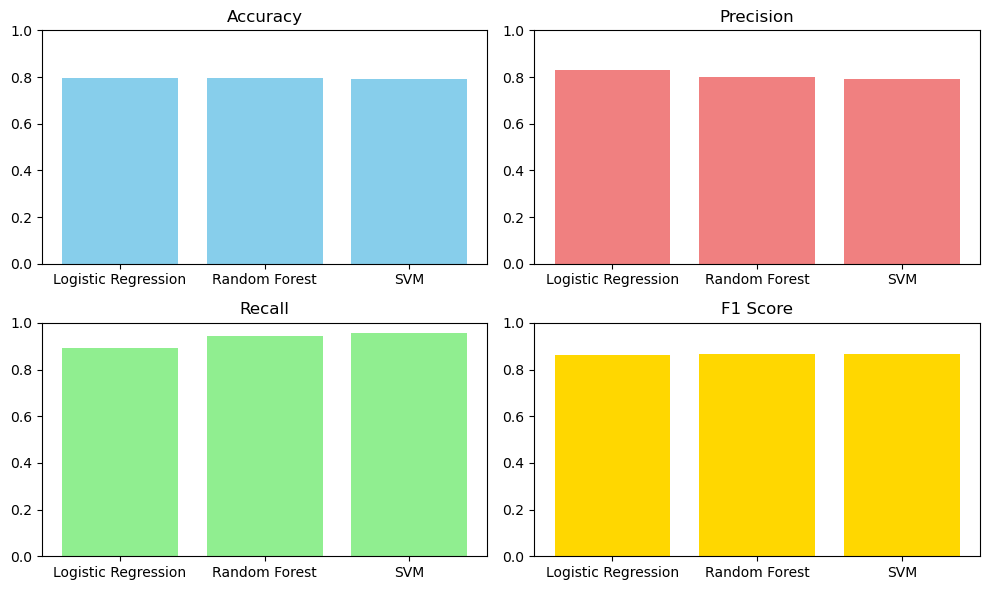

In [20]:
# Evalute using LR, RF, NB, SVM  
# ==============================================================================


# Evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_scores = [accuracy, accuracy_rf, accuracy_svm, ]
precision_scores = [precision, precision_rf, precision_svm, ]
recall_scores = [recall, recall_rf, recall_svm, ]
f1_scores = [f1, f1_rf, f1_svm, ]

# Plotting the comparison results
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracy_scores, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

# Plotting precision
plt.subplot(2, 2, 2)
plt.bar(models, precision_scores, color='lightcoral')
plt.title('Precision')
plt.ylim(0, 1)

# Plotting recall
plt.subplot(2, 2, 3)
plt.bar(models, recall_scores, color='lightgreen')
plt.title('Recall')
plt.ylim(0, 1)

# Plotting F1-score
plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='gold')
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()